In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import openpyxl as px

In [2]:
e1 = pd.read_excel(r"C:/Users/diana/OneDrive - Universidad de los Andes/Documentos/9no Semestre/TesisGEB_AlejaYCami/Repositorio/ProyectoGradoGEB/datos/EICH101.xlsx")

In [4]:
desc_e1 = e1.describe()
print(desc_e1)

       ORIG_STD_VOLUME     STD_VOLUME  ORIG_TEMPERATURE   TEMPERATURE  \
count     46849.000000   46849.000000      46849.000000  46849.000000   
mean        363.116016     363.223686         25.972458     25.972458   
std        1335.170290    1335.199042          2.650370      2.650370   
min           0.000000       0.000000         15.138673     15.138673   
25%         296.375000     296.375000         24.183510     24.183510   
50%         417.062500     417.063139         25.933928     25.933928   
75%         473.937500     473.968750         28.138079     28.138079   
max      262748.624998  262748.624998         31.580833     31.580833   

           PRESSURE  ORIG_PRESSURE  ORIG_RAW_VOLUME    RAW_VOLUME  
count  46849.000000   46849.000000     4.684900e+04  4.684900e+04  
mean      17.497431      17.497431     2.134519e+07  2.134519e+07  
std        0.565637       0.565637     4.620083e+09  4.620083e+09  
min        0.520184       0.520184     0.000000e+00  0.000000e+00  
25

## Nulos

In [5]:
nulos = e1.isnull().sum()
print(nulos)

ORIG_STD_VOLUME     0
STD_VOLUME          0
ORIG_TEMPERATURE    0
TEMPERATURE         0
PRESSURE            0
ORIG_PRESSURE       0
ORIG_RAW_VOLUME     0
RAW_VOLUME          0
EFFECTIVE_DATE      0
dtype: int64


## Duplicados

In [7]:
duplicados = e1.duplicated().sum()
print(f"Número de filas duplicadas: {duplicados}")

Número de filas duplicadas: 0


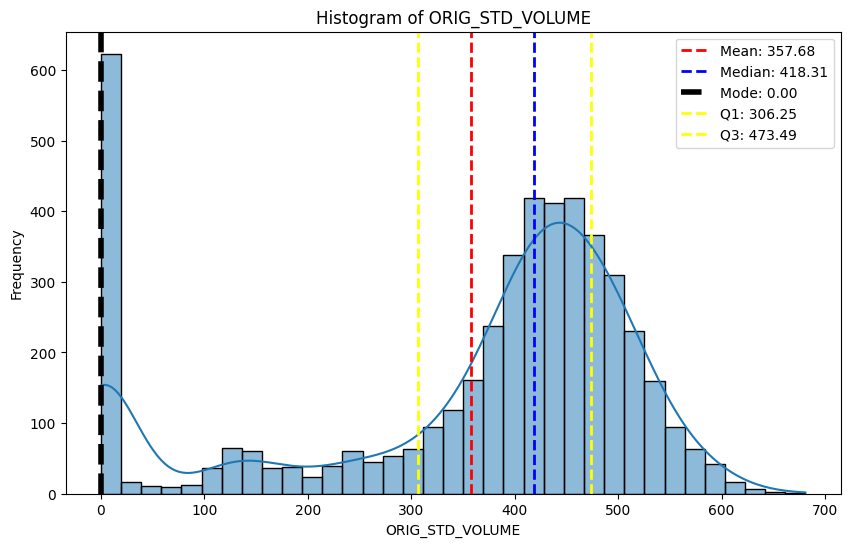

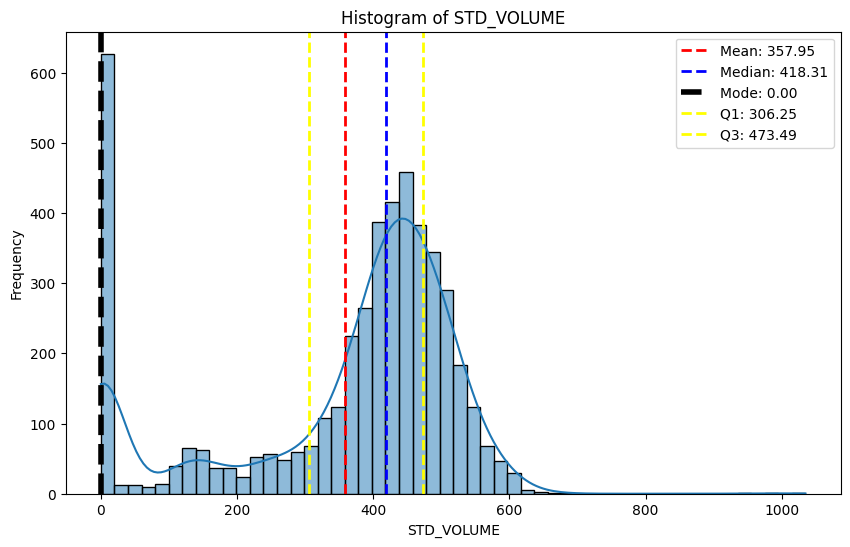

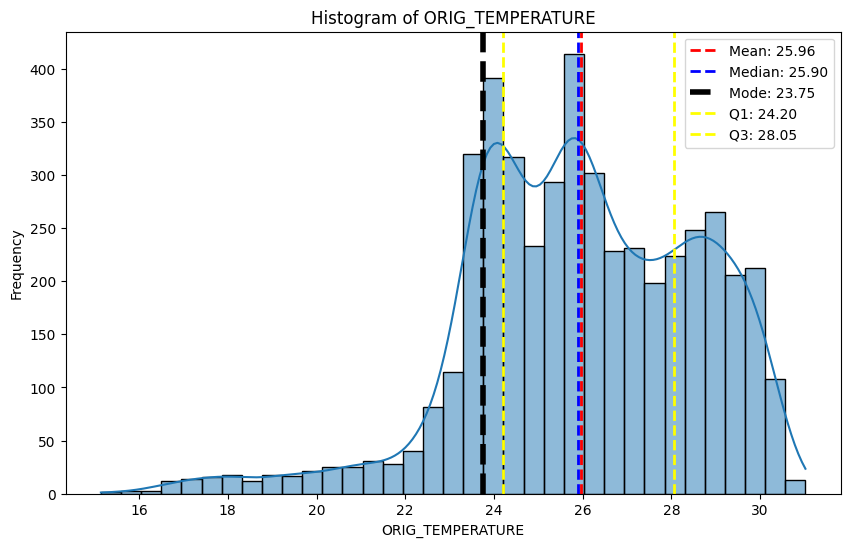

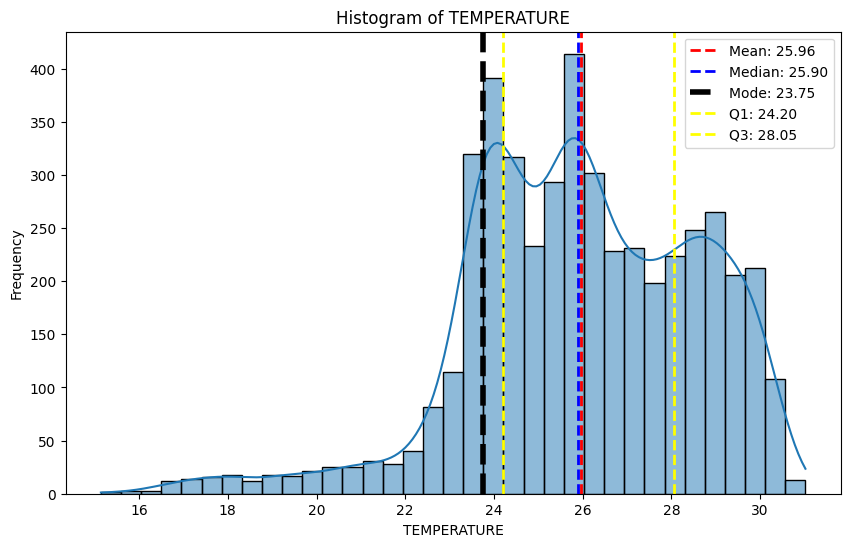

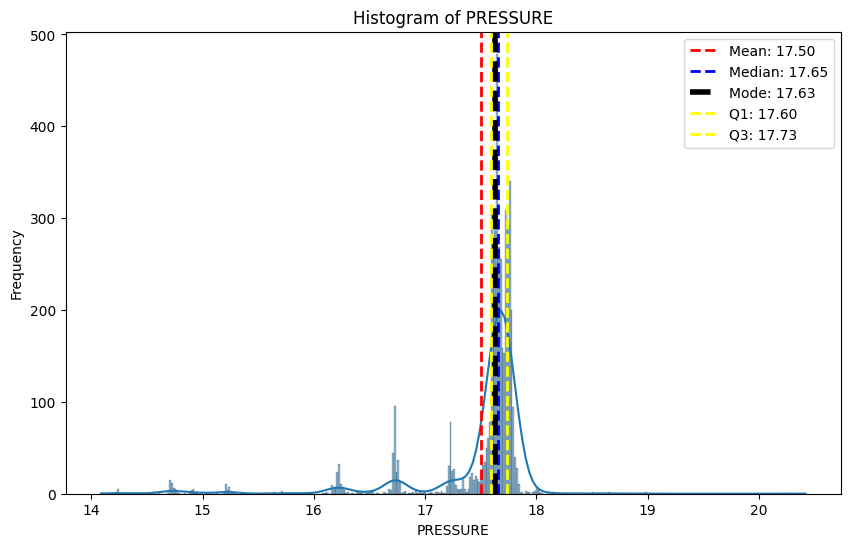

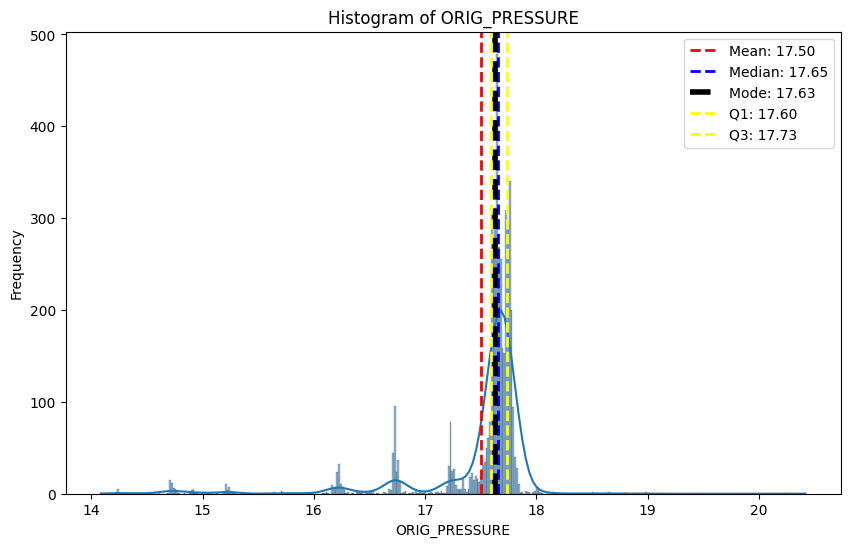

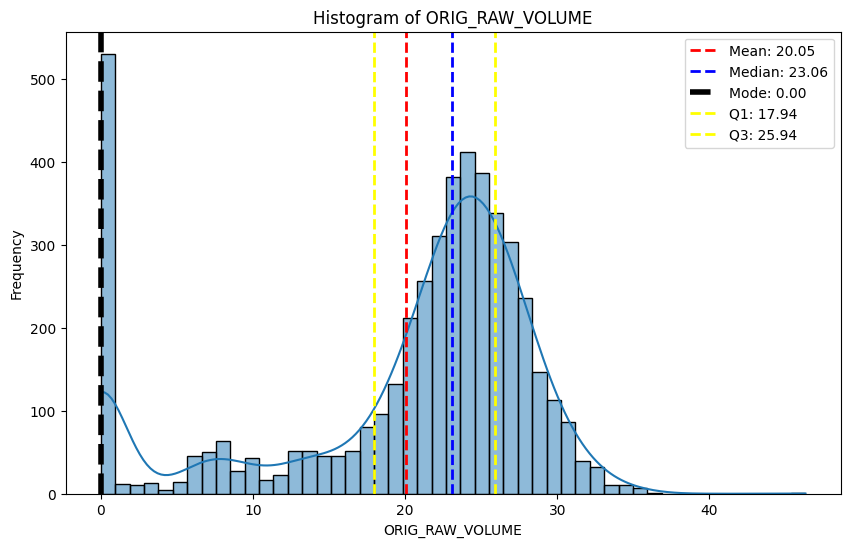

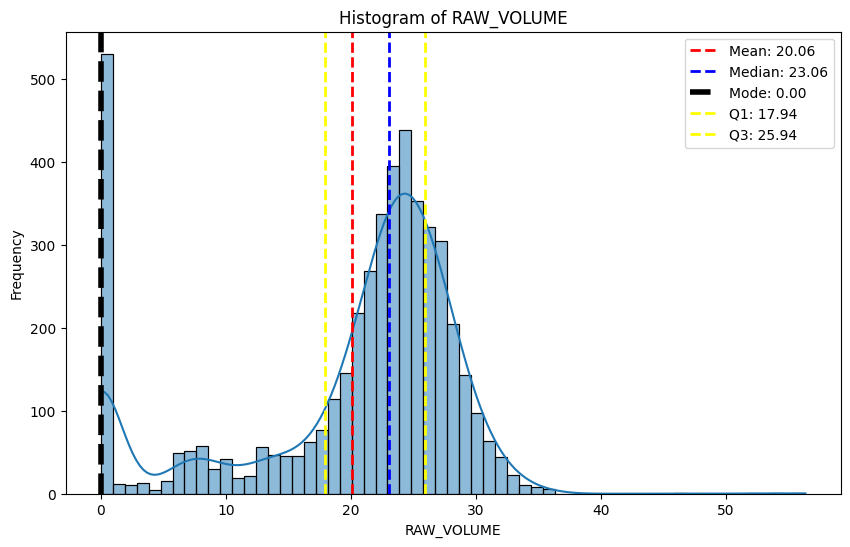

In [11]:
variables = ['ORIG_STD_VOLUME', 'STD_VOLUME', 'ORIG_TEMPERATURE', 'TEMPERATURE', 'PRESSURE', 'ORIG_PRESSURE', 'ORIG_RAW_VOLUME', 'RAW_VOLUME']

# Use a smaller sample of the data for plotting
sampled_e1 = e1.sample(frac=0.1, random_state=1)

for var in variables:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=sampled_e1, x=var, kde=True)
    
    mean = sampled_e1[var].mean()
    median = sampled_e1[var].median()
    mode = sampled_e1[var].mode().values[0]
    q1 = sampled_e1[var].quantile(0.25)
    q3 = sampled_e1[var].quantile(0.75)
    
    plt.axvline(x=mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
    plt.axvline(x=median, color='blue', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')
    plt.axvline(x=mode, color='black', linestyle='dashed', linewidth=4, label=f'Mode: {mode:.2f}')
    plt.axvline(x=q1, color='yellow', linestyle='dashed', linewidth=2, label=f'Q1: {q1:.2f}')
    plt.axvline(x=q3, color='yellow', linestyle='dashed', linewidth=2, label=f'Q3: {q3:.2f}')
    
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

- Tanto en las mediciones de volumen original (RAW) como en las condiciones estándar (STD), se observa una distribución bimodal con un gran pico en cero. Esto sugiere que hay períodos en los que no hay consumo o el medidor está registrando valores nulos. 
- Temperatura y presión se comportan de manera consistente

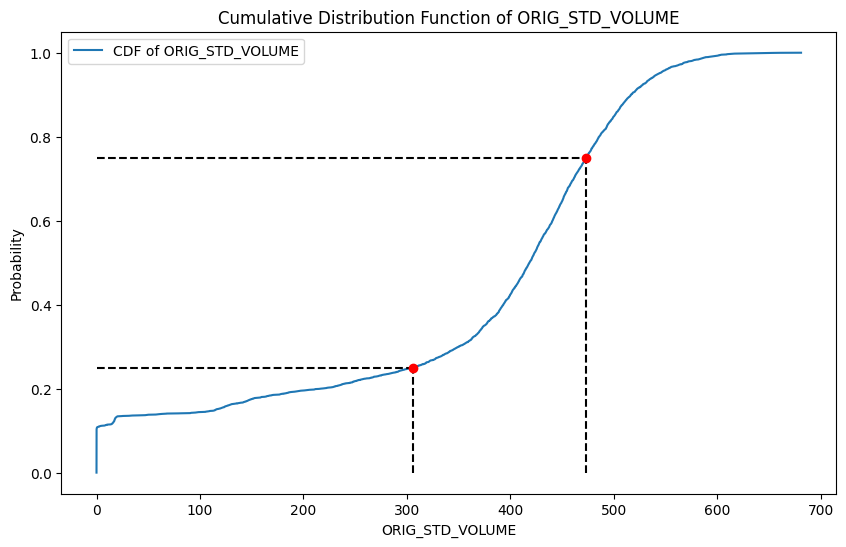

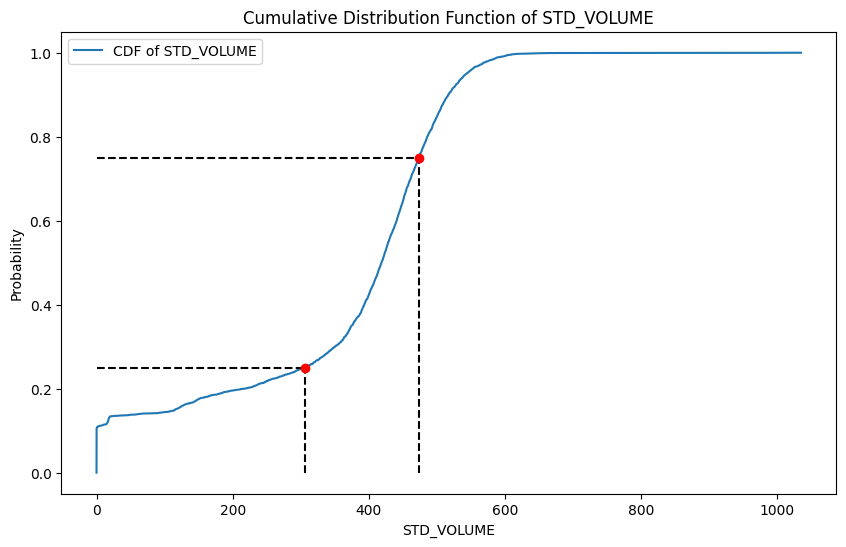

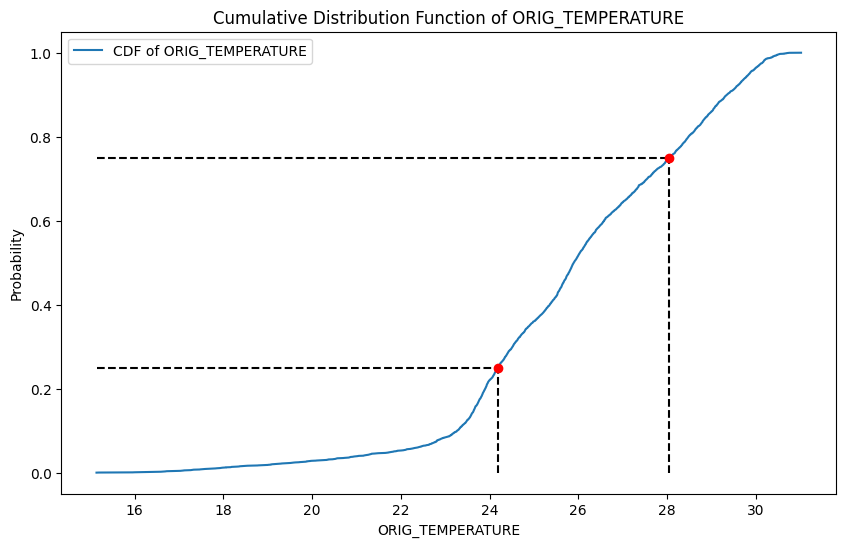

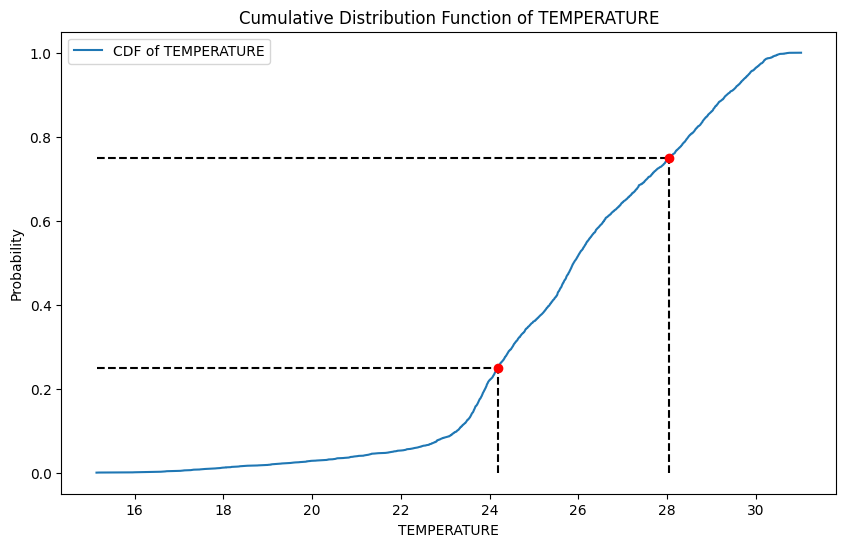

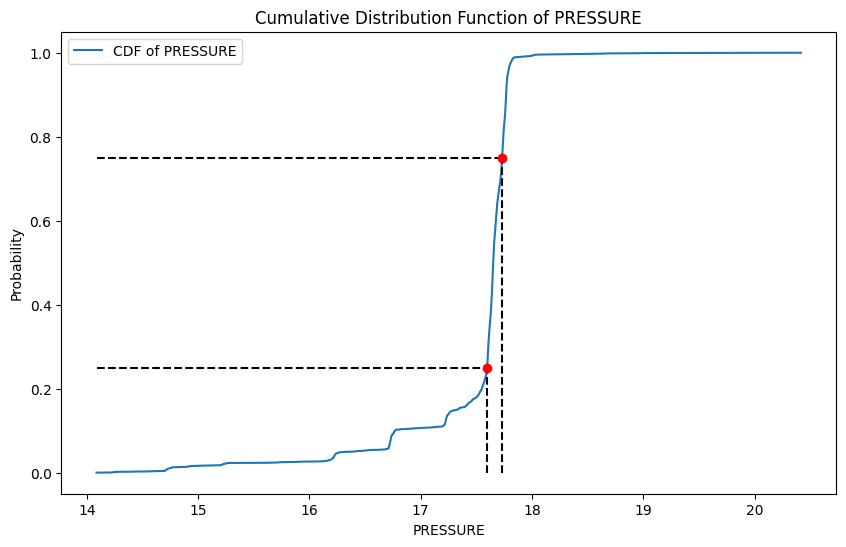

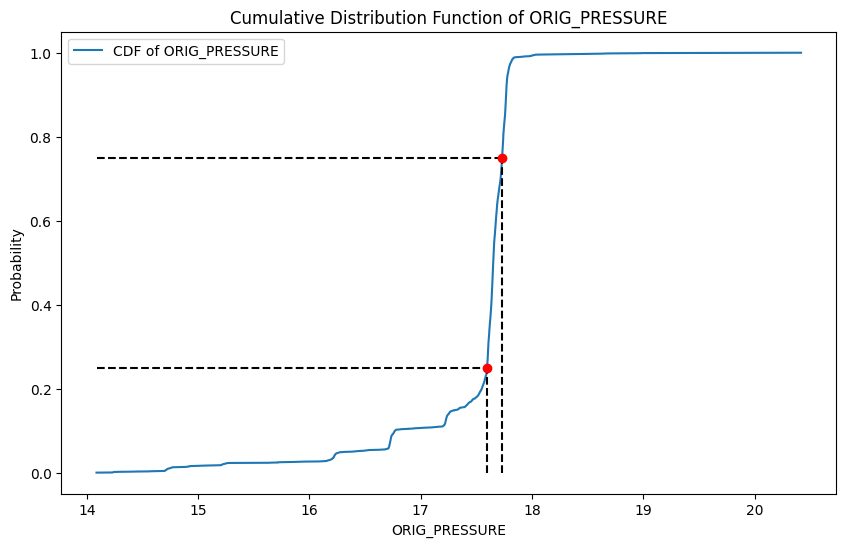

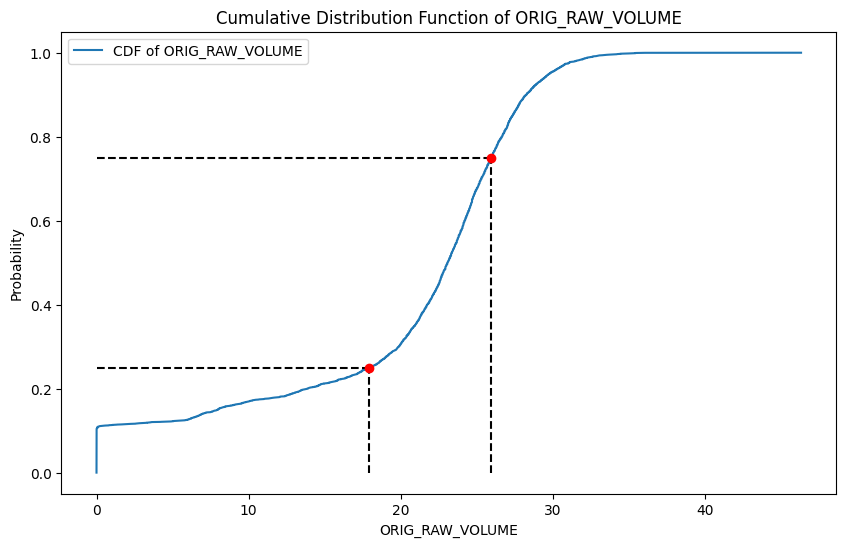

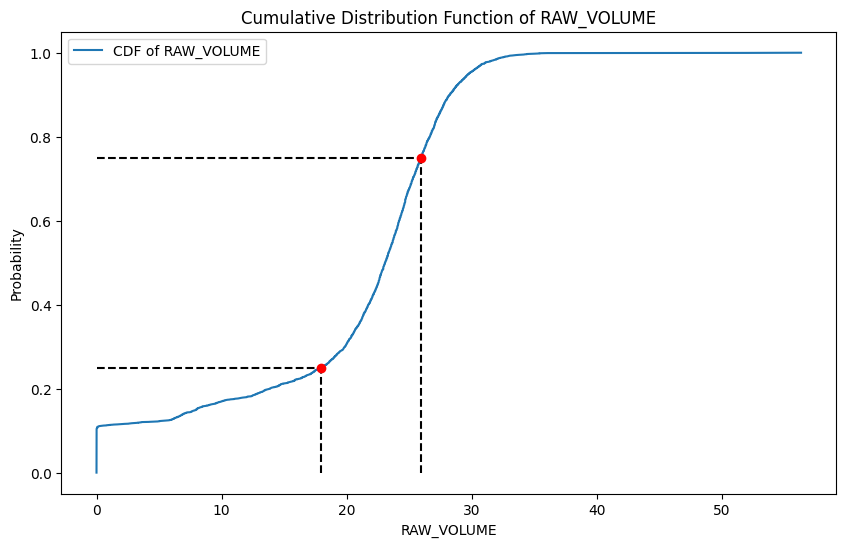

In [12]:
for var in variables:
    # Calculate the cumulative distribution function (CDF)
    sorted_data = np.sort(sampled_e1[var])
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    
    # Specify probabilities
    p_1 = 0.25
    p_2 = 0.75
    ps = (p_1, p_2)
    
    # Calculate the quantiles
    qs = np.percentile(sorted_data, [p * 100 for p in ps])
    
    # Plot the CDF
    plt.figure(figsize=(10, 6))
    plt.plot(sorted_data, cdf, label=f'CDF of {var}')
    
    # Add vertical lines for the quantiles
    plt.vlines(
        x=qs,
        ymin=0,
        ymax=ps,
        color='black',
        linestyle='dashed'
    )
    
    # Add horizontal lines for the probabilities
    plt.hlines(
        y=ps,
        xmin=sorted_data[0],
        xmax=qs,
        color='black',
        linestyle='dashed'
    )
    
    # Add scatter points for the quantiles
    plt.scatter(
        x=qs,
        y=ps,
        color='red',
        zorder=2
    )
    
    plt.title(f'Cumulative Distribution Function of {var}')
    plt.xlabel(var)
    plt.ylabel('Probability')
    plt.legend()
    plt.show()

- Estabilidad de las Variables: Tanto la temperatura como la presión presentan distribuciones bien definidas y sin valores extremos, lo que sugiere un control adecuado en las condiciones operativas.
- Volumen con Mayor Variabilidad: El volumen es la variable que presenta más dispersión y requiere un monitoreo más detallado para identificar posibles anomalías o patrones operativos.
- Valores Percentiles Útiles para Monitoreo: Las marcas en los percentiles 25 y 75 pueden ser utilizadas como referencia para definir umbrales normales y detectar posibles eventos fuera de lo común.

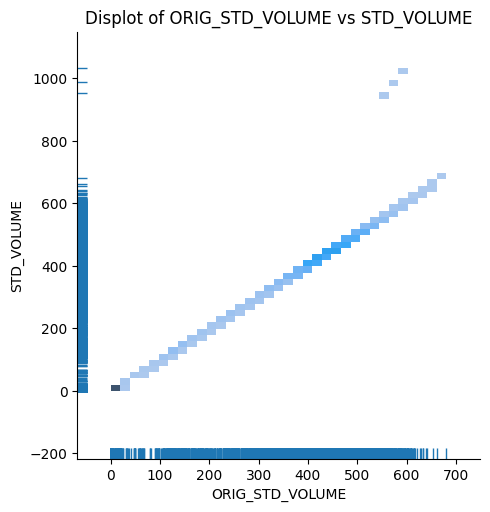

In [13]:
sns.displot(
    data=sampled_e1,
    x='ORIG_STD_VOLUME',
    y='STD_VOLUME',
    rug=True
)
plt.title('Displot of ORIG_STD_VOLUME vs STD_VOLUME')
plt.xlabel('ORIG_STD_VOLUME')
plt.ylabel('STD_VOLUME')
plt.show()

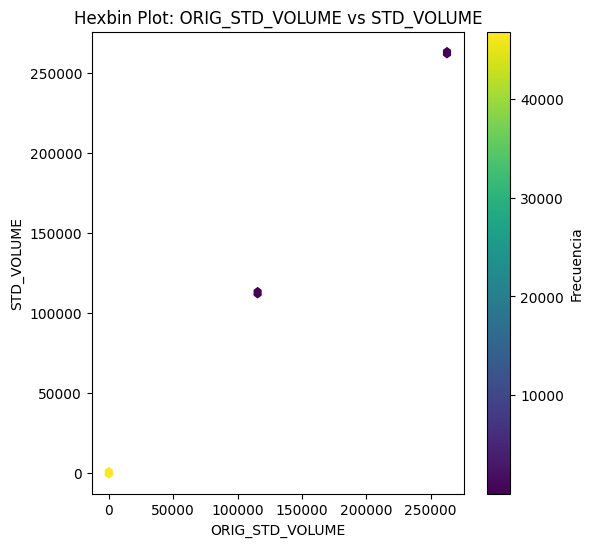

In [17]:
plt.figure(figsize=(6, 6))

# Hexbin con 50 bins y escala logarítmica para resaltar diferencias de densidad
plt.hexbin(e1['ORIG_STD_VOLUME'], e1['STD_VOLUME'], gridsize=50, mincnt=1)

# Mejoras visuales
plt.colorbar(label="Frecuencia")
plt.xlabel("ORIG_STD_VOLUME")
plt.ylabel("STD_VOLUME")
plt.title("Hexbin Plot: ORIG_STD_VOLUME vs STD_VOLUME")

plt.show()


En términos operativos, los puntos morados pueden representar picos de demanda inusuales o fugas en el sistema.
También podrían indicar errores en la captura de datos o registros erróneos.

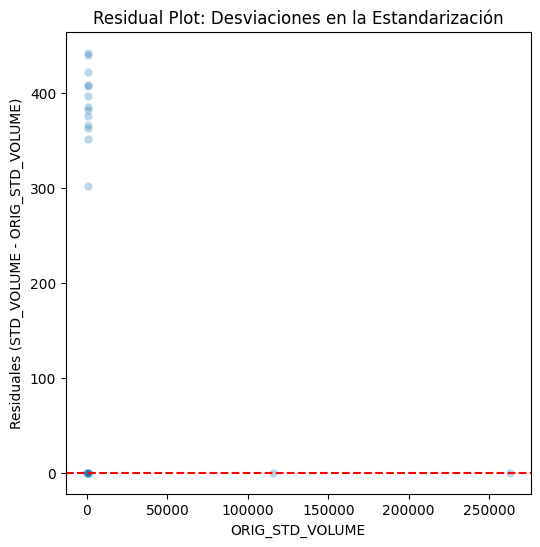

In [18]:
import numpy as np

# Calcular residuales
e1["Residuals"] = e1["STD_VOLUME"] - e1["ORIG_STD_VOLUME"]

plt.figure(figsize=(6, 6))

# Scatter plot de residuales
sns.scatterplot(x=e1["ORIG_STD_VOLUME"], y=e1["Residuals"], alpha=0.3)

# Línea base en 0 para ver desviaciones
plt.axhline(y=0, color="red", linestyle="--")

# Mejoras visuales
plt.xlabel("ORIG_STD_VOLUME")
plt.ylabel("Residuales (STD_VOLUME - ORIG_STD_VOLUME)")
plt.title("Residual Plot: Desviaciones en la Estandarización")

plt.show()


- La mayoría de los puntos están alineados en la línea roja (residuo = 0), lo que indica que la conversión de ORIG_STD_VOLUME a STD_VOLUME es consistente.
- Sin embargo, en valores bajos de ORIG_STD_VOLUME, se observan algunos puntos con residuales altos (300-400), lo que sugiere que en ciertos casos hay diferencias notables en la estandarización del volumen.

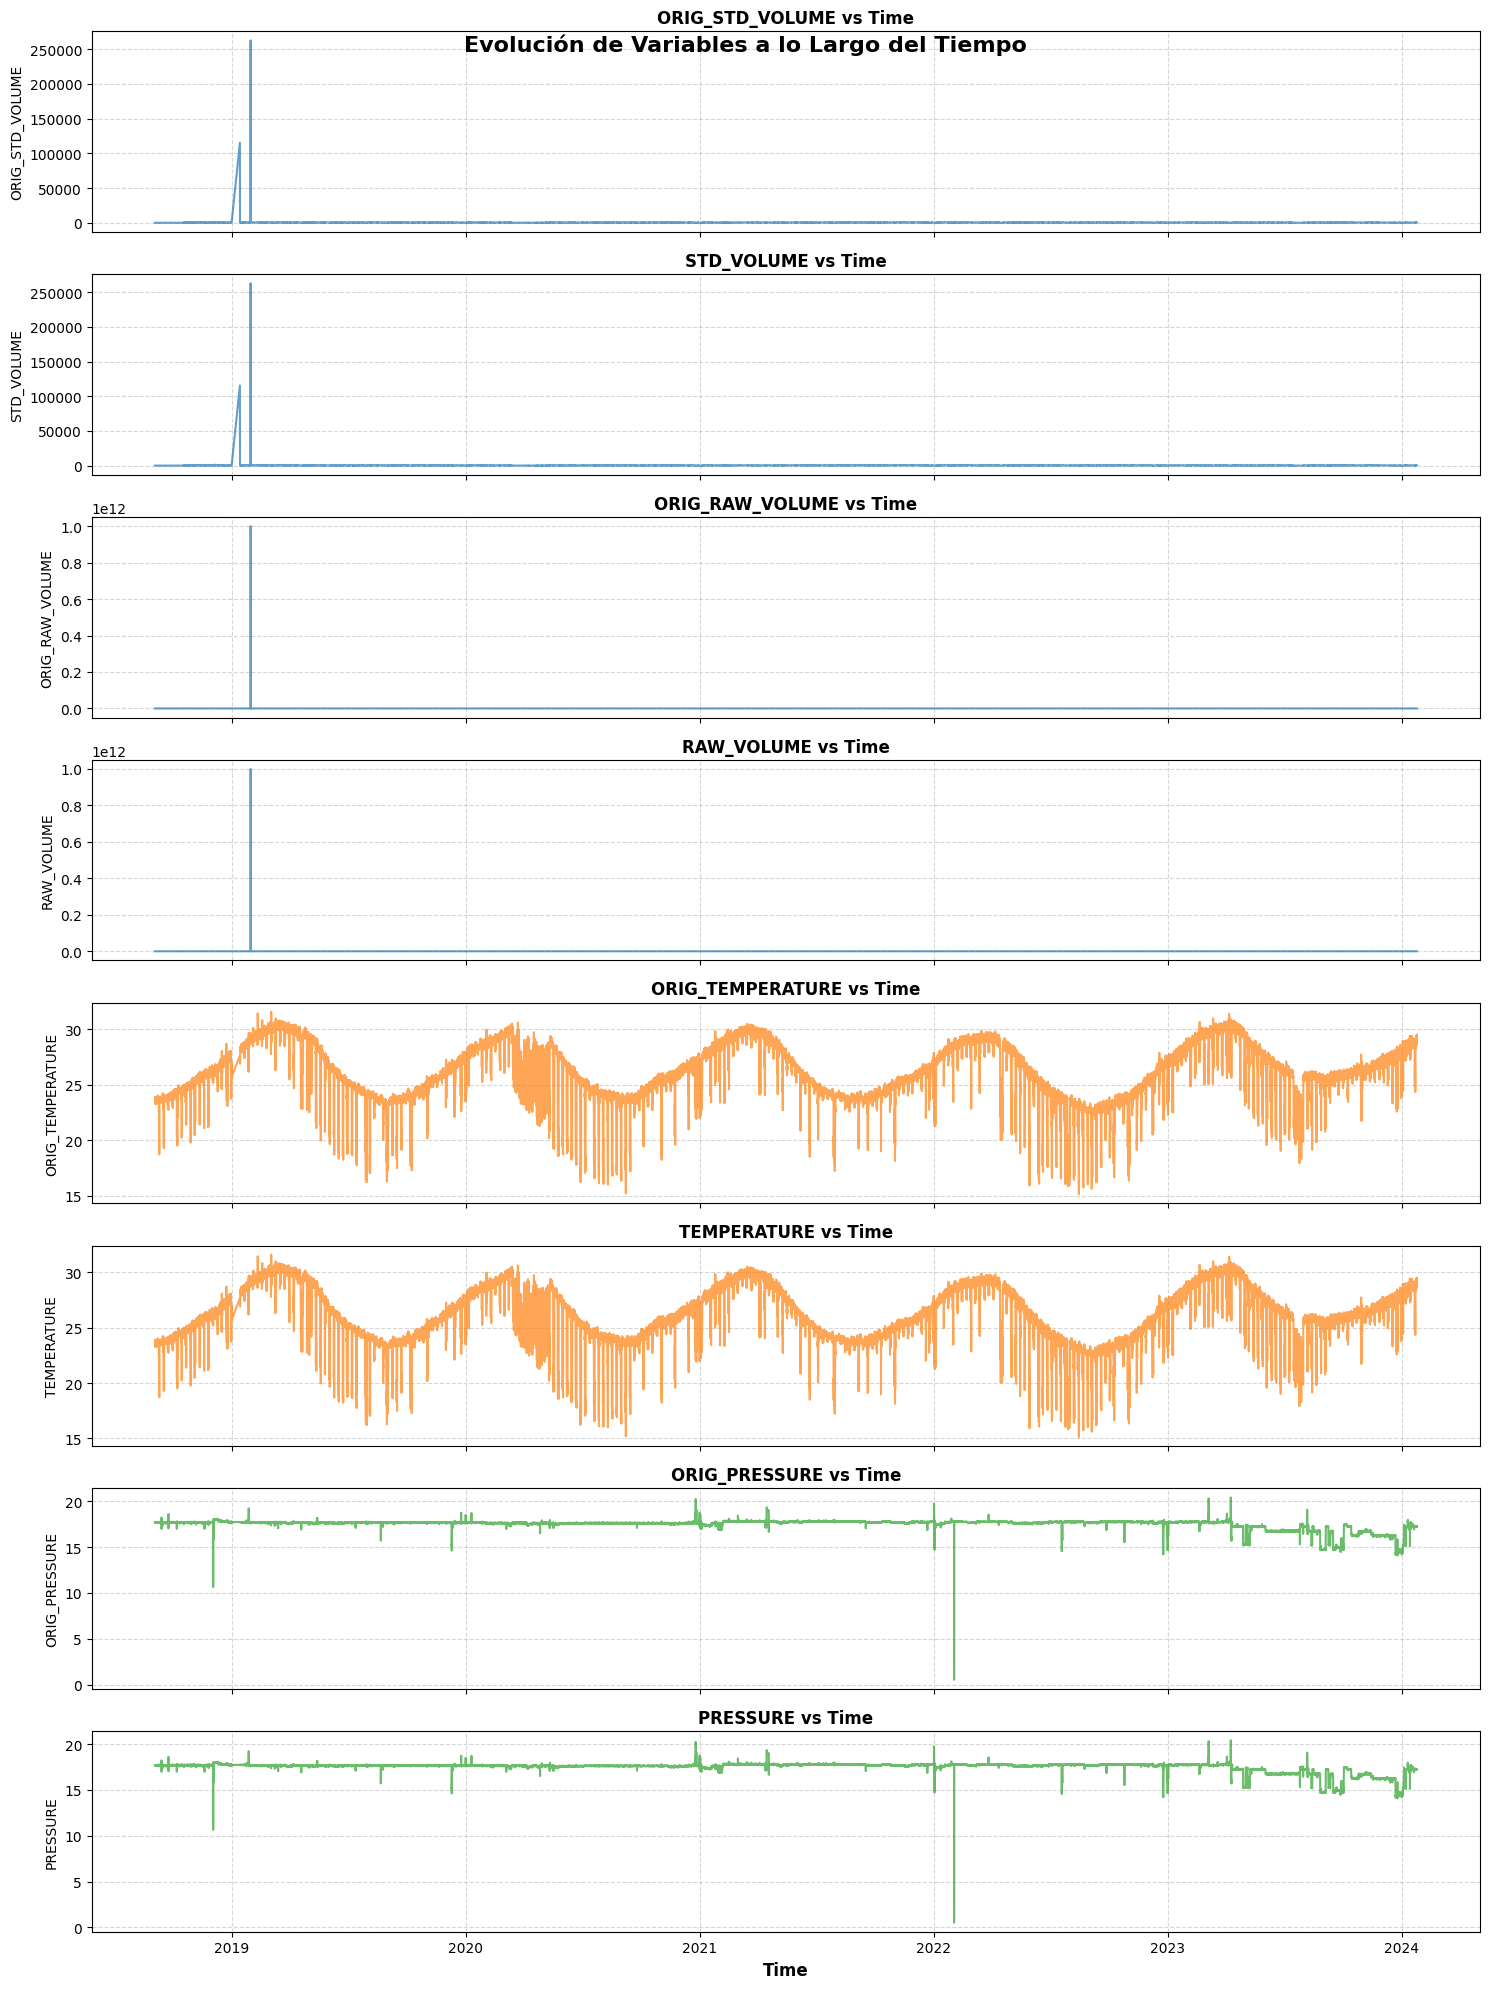

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convertir la columna EFFECTIVE_DATE a datetime si no lo está
e1['EFFECTIVE_DATE'] = pd.to_datetime(e1['EFFECTIVE_DATE'])

# Definir las variables por categorías
volumen_vars = ['ORIG_STD_VOLUME', 'STD_VOLUME', 'ORIG_RAW_VOLUME', 'RAW_VOLUME']
temperatura_vars = ['ORIG_TEMPERATURE', 'TEMPERATURE']
presion_vars = ['ORIG_PRESSURE', 'PRESSURE']

# Unificar todas las variables en una sola lista para iteración
variables = volumen_vars + temperatura_vars + presion_vars

# Definir colores para cada categoría
colores = {
    'Volumen': '#1f77b4',      # Azul
    'Temperatura': '#ff7f0e',  # Naranja
    'Presión': '#2ca02c'       # Verde
}

# Crear una figura con subgráficos
fig, axs = plt.subplots(len(variables), 1, figsize=(15, 20), sharex=True)

# Iterar sobre las variables y asignar color según su categoría
for i, var in enumerate(variables):
    if var in volumen_vars:
        color = colores['Volumen']
    elif var in temperatura_vars:
        color = colores['Temperatura']
    else:
        color = colores['Presión']
    
    sns.lineplot(data=e1, x='EFFECTIVE_DATE', y=var, ax=axs[i], color=color, alpha=0.7)
    
    axs[i].set_title(f'{var} vs Time', fontsize=12, fontweight='bold')
    axs[i].set_ylabel(var)
    axs[i].grid(True, linestyle='--', alpha=0.5)  # Agregar grid ligero para mejor legibilidad

# Ajustar el diseño y la etiqueta del eje X
axs[-1].set_xlabel('Time', fontsize=12, fontweight='bold')

# Espaciado óptimo entre subgráficos
plt.tight_layout()

# Título general de la figura
plt.suptitle("Evolución de Variables a lo Largo del Tiempo", fontsize=16, fontweight='bold')

plt.show()


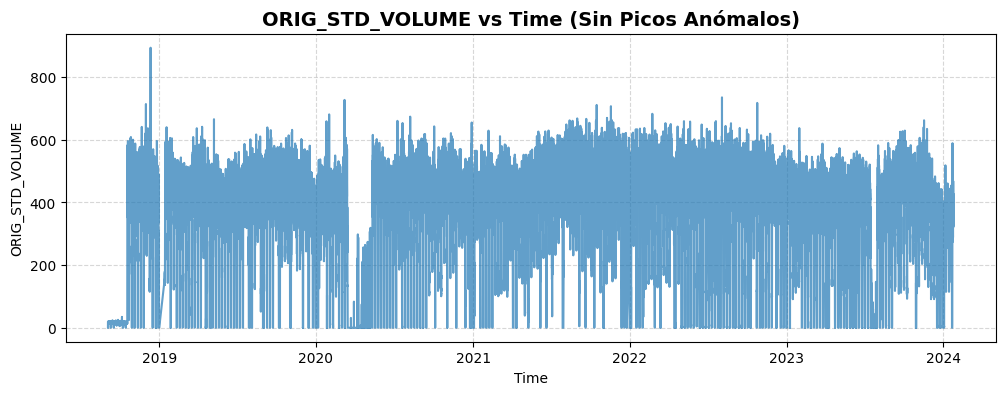

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Asumimos que ya tenemos los datos en un DataFrame llamado e1
# Primero, identificamos los dos valores más altos en ORIG_STD_VOLUME
top_values = e1['ORIG_STD_VOLUME'].nlargest(3)

# Filtramos los datos eliminando estos dos picos
e1_filtered = e1[~e1['ORIG_STD_VOLUME'].isin(top_values)]

# Crear la gráfica sin los picos
plt.figure(figsize=(12, 4))
plt.plot(e1_filtered['EFFECTIVE_DATE'], e1_filtered['ORIG_STD_VOLUME'], color='#1f77b4', alpha=0.7)
plt.title("ORIG_STD_VOLUME vs Time (Sin Picos Anómalos)", fontsize=14, fontweight='bold')
plt.xlabel("Time")
plt.ylabel("ORIG_STD_VOLUME")
plt.grid(True, linestyle='--', alpha=0.5)

# Mostrar la gráfica
plt.show()


- El 1400 podría también anomalía

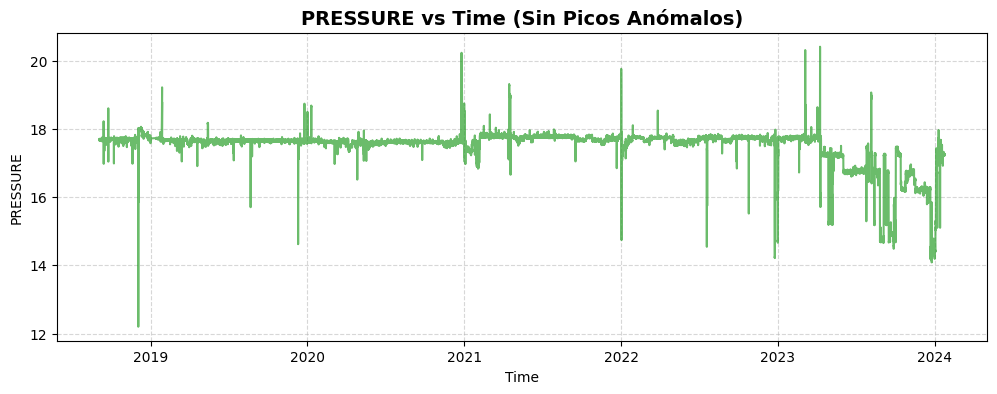

In [35]:
# Identificar los dos valores más altos en PRESSURE
top_values_pressure = e1['PRESSURE'].nlargest(2)
smallest_values_pressure = e1['PRESSURE'].nsmallest(3)

# Filtrar los datos eliminando estos dos picos
#e1_filtered_pressure = e1[~e1['PRESSURE'].isin(top_values_pressure)]
e1_filtered_pressure = e1[~e1['PRESSURE'].isin(smallest_values_pressure)]

# Crear la gráfica sin los picos en presión
plt.figure(figsize=(12, 4))
plt.plot(e1_filtered_pressure['EFFECTIVE_DATE'], e1_filtered_pressure['PRESSURE'], color='#2ca02c', alpha=0.7)
plt.title("PRESSURE vs Time (Sin Picos Anómalos)", fontsize=14, fontweight='bold')
plt.xlabel("Time")
plt.ylabel("PRESSURE")
plt.grid(True, linestyle='--', alpha=0.5)

# Mostrar la gráfica
plt.show()


🔴 Todavía hay eventos de presión baja que podrían ser de interés.
🔴 Algunas caídas abruptas pueden indicar fallos en sensores o eventos operativos específicos.
🔴 En 2023-2024, se ve más inestabilidad en la presión, lo que podría reflejar cambios en las condiciones del sistema o problemas operativos recientes.